<a href="https://colab.research.google.com/github/flexycode/CCMACLRL_COM231_PROJECT/blob/main/notebook/WWE_Superstar_Popularity_Tier_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WWE Superstar Popularity Tier Prediction using Multi-class Classification

# Multi-class Classification using Machine Learning

This project implements a machine learning system to predict WWE superstar popularity tiers (Main Eventer, Midcard, Enhancement) based on career statistics and performance metrics.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# 1. Data Loading and Initial Exploration

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Load the datasets

In [3]:
try:
    wwe_data = pd.read_csv('wwe_rosters.csv')
    other_brand_data = pd.read_csv('other_brand_rosters.csv')
    print("✅ Datasets loaded successfully!")
except:
    print("⚠️  Local files not found, loading from provided data...")
    # In Colab/Kaggle, you need to upload these files

✅ Datasets loaded successfully!


## Display basic information about WWE dataset

In [4]:
print("=" * 50)
print("WWE DATASET INFORMATION")
print("=" * 50)
print(f"Dataset Shape: {wwe_data.shape}")
print(f"Columns: {wwe_data.columns.tolist()}")
print("\nFirst 5 rows:")
display(wwe_data.head())

print("\nDataset Info:")
wwe_data.info()

print("\nBasic Statistics:")
display(wwe_data.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = wwe_data.isnull().sum()
print(missing_values[missing_values > 0])


WWE DATASET INFORMATION
Dataset Shape: (185, 18)
Columns: ['wrestler_id', 'wrestler_name', 'brand', 'debut_year', 'years_active', 'total_matches', 'world_title_reigns', 'secondary_title_reigns', 'tag_title_reigns', 'total_title_reigns', 'current_champion', 'avg_matches_per_month', 'career_win_percentage', 'social_media_followers_millions', 'main_evented_ppv', 'age', 'weight_class', 'popularity_tier']

First 5 rows:


,wrestler_id,wrestler_name,brand,debut_year,years_active,total_matches,world_title_reigns,secondary_title_reigns,tag_title_reigns,total_title_reigns,current_champion,avg_matches_per_month,career_win_percentage,social_media_followers_millions,main_evented_ppv,age,weight_class,popularity_tier
0,1,Cody Rhodes,SmackDown,2007,18,980,4,2,0,6,1,3.2,0.69,4.0,20,39,Heavyweight,Main Eventer
1,2,Seth Rollins,RAW,2012,13,1180,5,2,2,9,1,4.3,0.65,3.6,21,39,Heavyweight,Main Eventer
2,3,Roman Reigns,SmackDown,2012,13,1025,6,1,1,8,0,3.3,0.66,4.9,33,40,Heavyweight,Main Eventer
3,4,Rhea Ripley,RAW,2021,4,290,3,1,0,4,0,4.6,0.73,3.0,13,29,Women's,Main Eventer
4,5,Becky Lynch,RAW,2013,12,640,5,3,0,8,1,3.7,0.68,4.3,16,38,Women's,Main Eventer



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wrestler_id                      185 non-null    int64  
 1   wrestler_name                    185 non-null    object 
 2   brand                            185 non-null    object 
 3   debut_year                       185 non-null    int64  
 4   years_active                     185 non-null    int64  
 5   total_matches                    185 non-null    int64  
 6   world_title_reigns               185 non-null    int64  
 7   secondary_title_reigns           185 non-null    int64  
 8   tag_title_reigns                 185 non-null    int64  
 9   total_title_reigns               185 non-null    int64  
 10  current_champion                 185 non-null    int64  
 11  avg_matches_per_month            185 non-null    float64
 12  career_

,wrestler_id,debut_year,years_active,total_matches,world_title_reigns,secondary_title_reigns,tag_title_reigns,total_title_reigns,current_champion,avg_matches_per_month,career_win_percentage,social_media_followers_millions,main_evented_ppv,age
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,93.000000,2015.091892,9.745946,333.410811,0.848649,0.681081,0.529730,2.059459,0.086486,3.067189,0.625351,1.202703,4.664865,34.172973
std,53.549043,8.644374,8.423911,332.442859,2.576822,1.142518,1.429667,4.095561,0.281844,0.662083,0.505363,2.669950,11.801626,7.760149
min,1.000000,1984.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.300000,0.100000,0.000000,21.000000
25%,47.000000,2010.000000,3.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.490000,0.300000,0.000000,28.000000
50%,93.000000,2018.000000,7.000000,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.540000,0.400000,0.000000,33.000000
75%,139.000000,2022.000000,15.000000,450.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.400000,0.600000,1.200000,3.000000,39.000000
max,185.000000,2025.000000,41.000000,1870.000000,16.000000,5.000000,8.000000,23.000000,1.000000,4.600000,4.300000,26.000000,85.000000,60.000000



Missing Values:
Series([], dtype: int64)


# 2. Exploratory Data Analysis (EDA)

## Set up the plotting style

In [5]:
plt.rcParams['figure.figsize'] = [12, 8]

### A. Target Variable Distribution

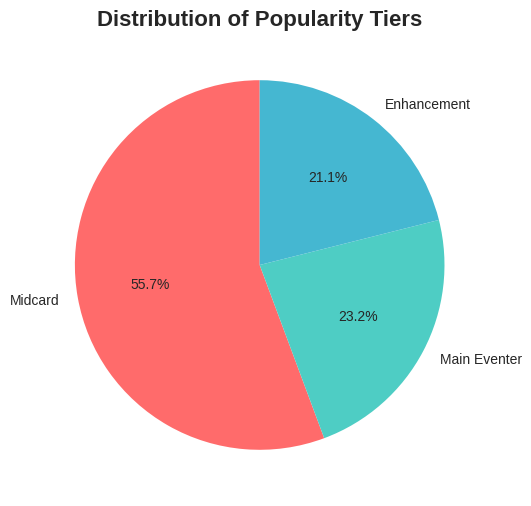

In [6]:
plt.figure(figsize=(10, 6))
target_dist = wwe_data['popularity_tier'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Distribution of Popularity Tiers', fontsize=16, fontweight='bold')
plt.show()

### B. Numerical Features Distribution

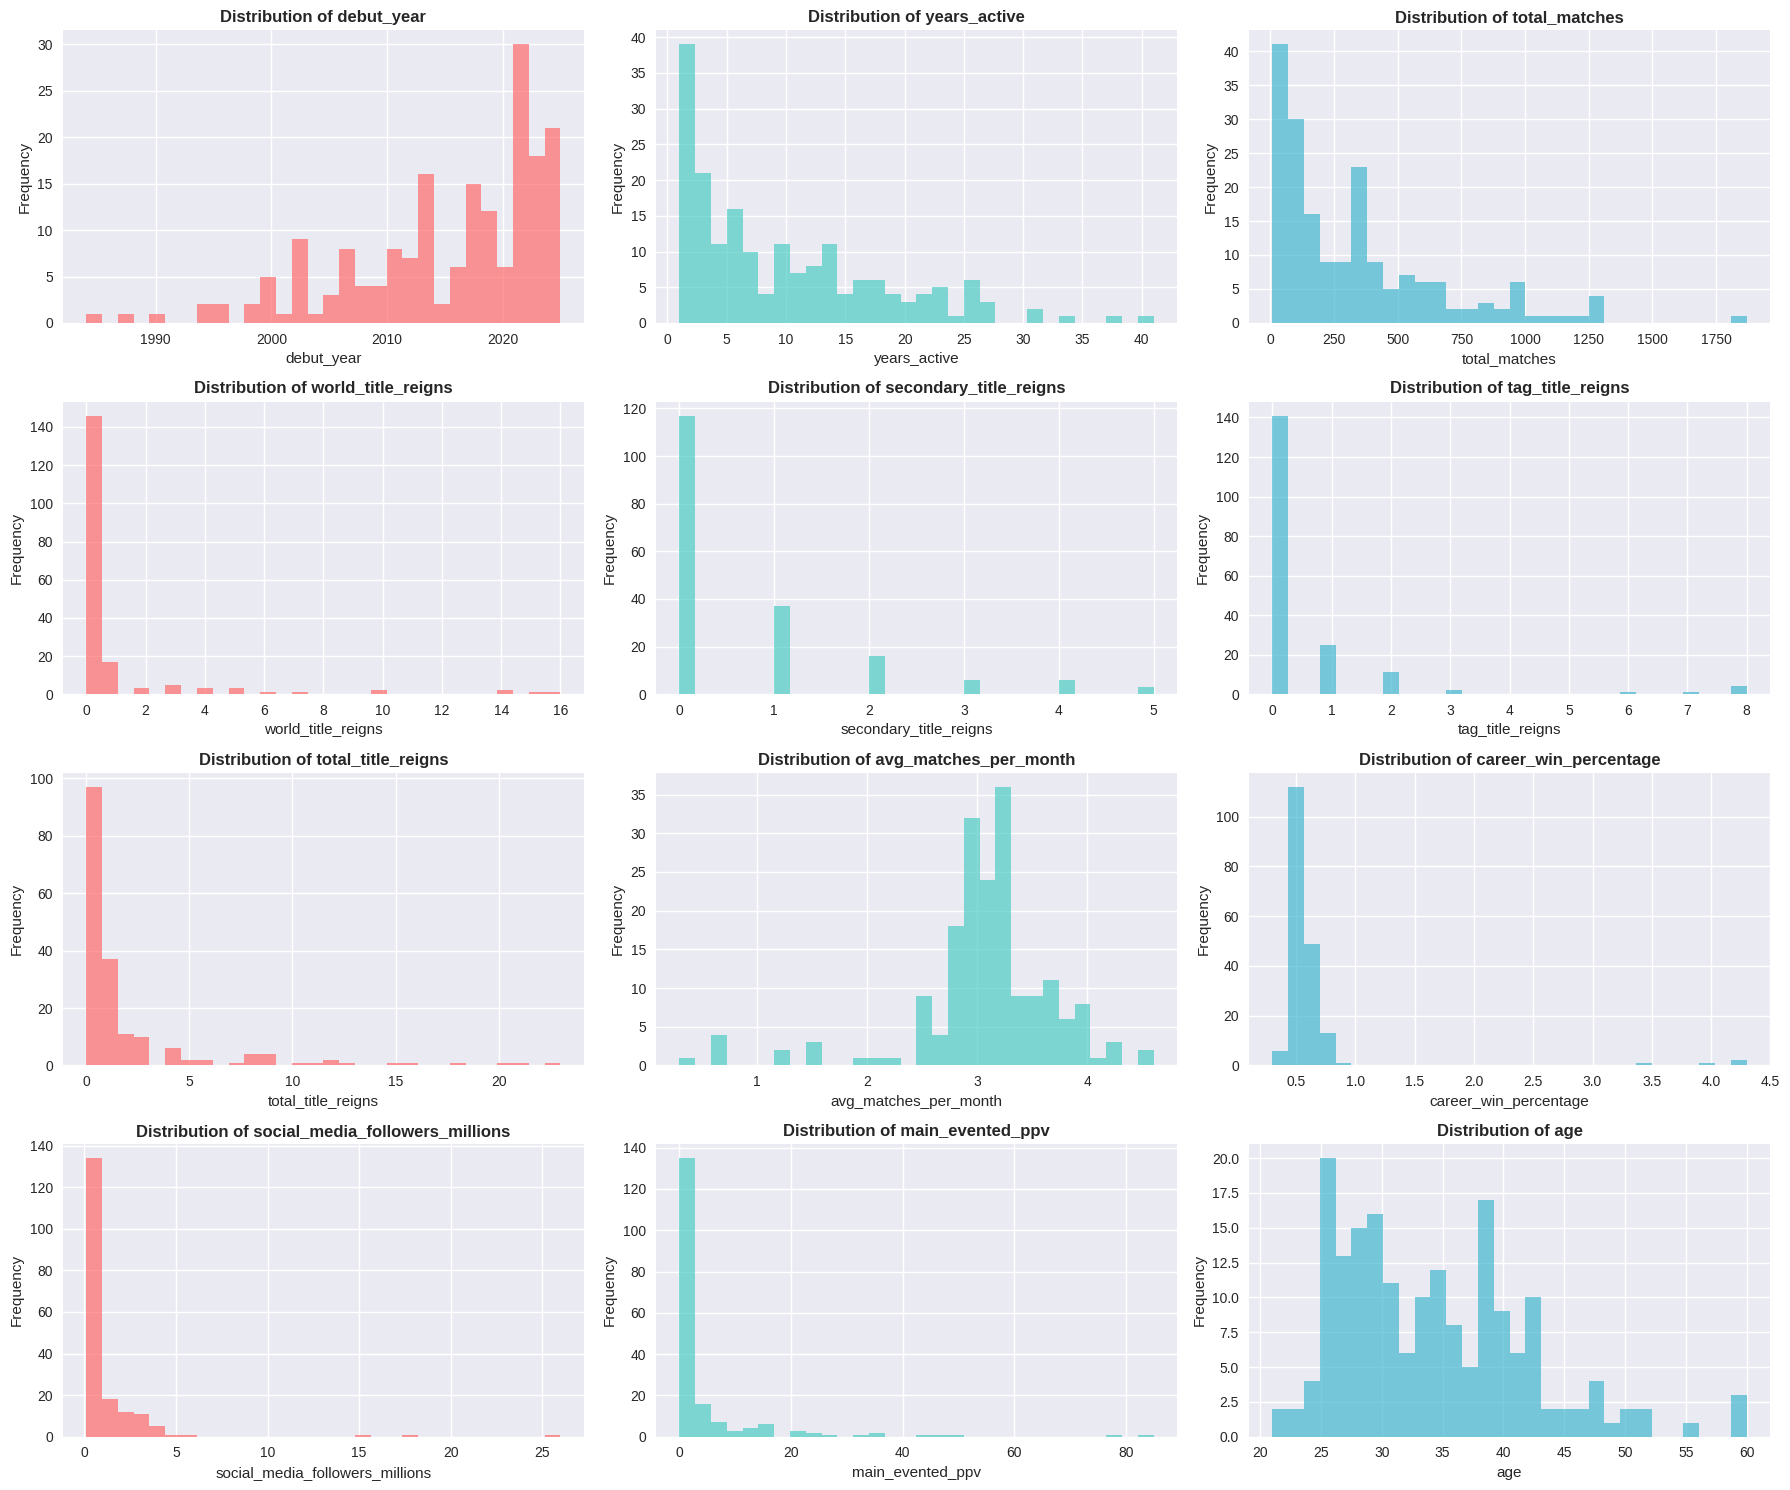

In [7]:
numerical_features = ['debut_year', 'years_active', 'total_matches', 'world_title_reigns',
                    'secondary_title_reigns', 'tag_title_reigns', 'total_title_reigns',
                    'avg_matches_per_month', 'career_win_percentage',
                    'social_media_followers_millions', 'main_evented_ppv', 'age']

fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    wwe_data[feature].hist(bins=30, ax=axes[i], alpha=0.7, color=colors[i % 3])
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### C. Correlation Heatmap

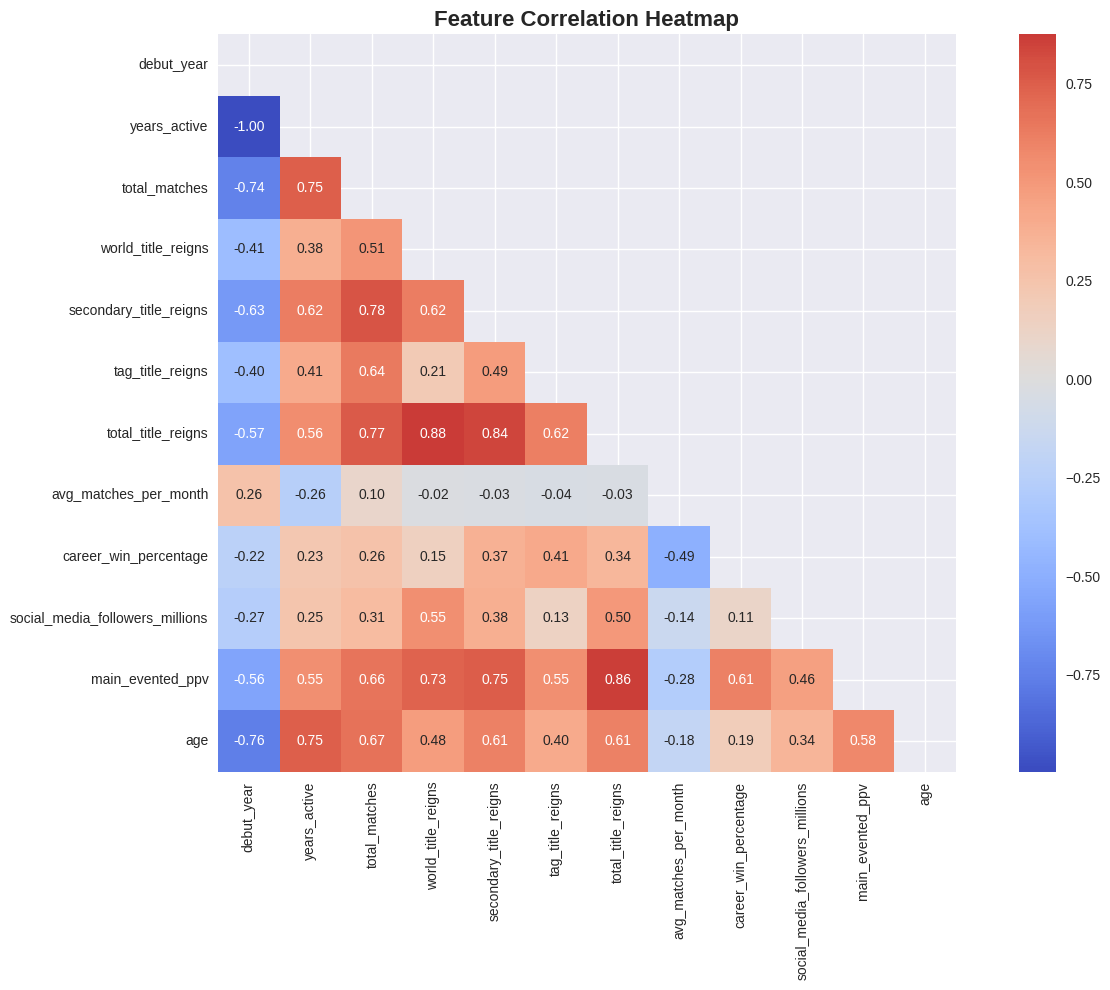

In [8]:
plt.figure(figsize=(14, 10))
correlation_matrix = wwe_data[numerical_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

D. Feature Relationships with Target Variable

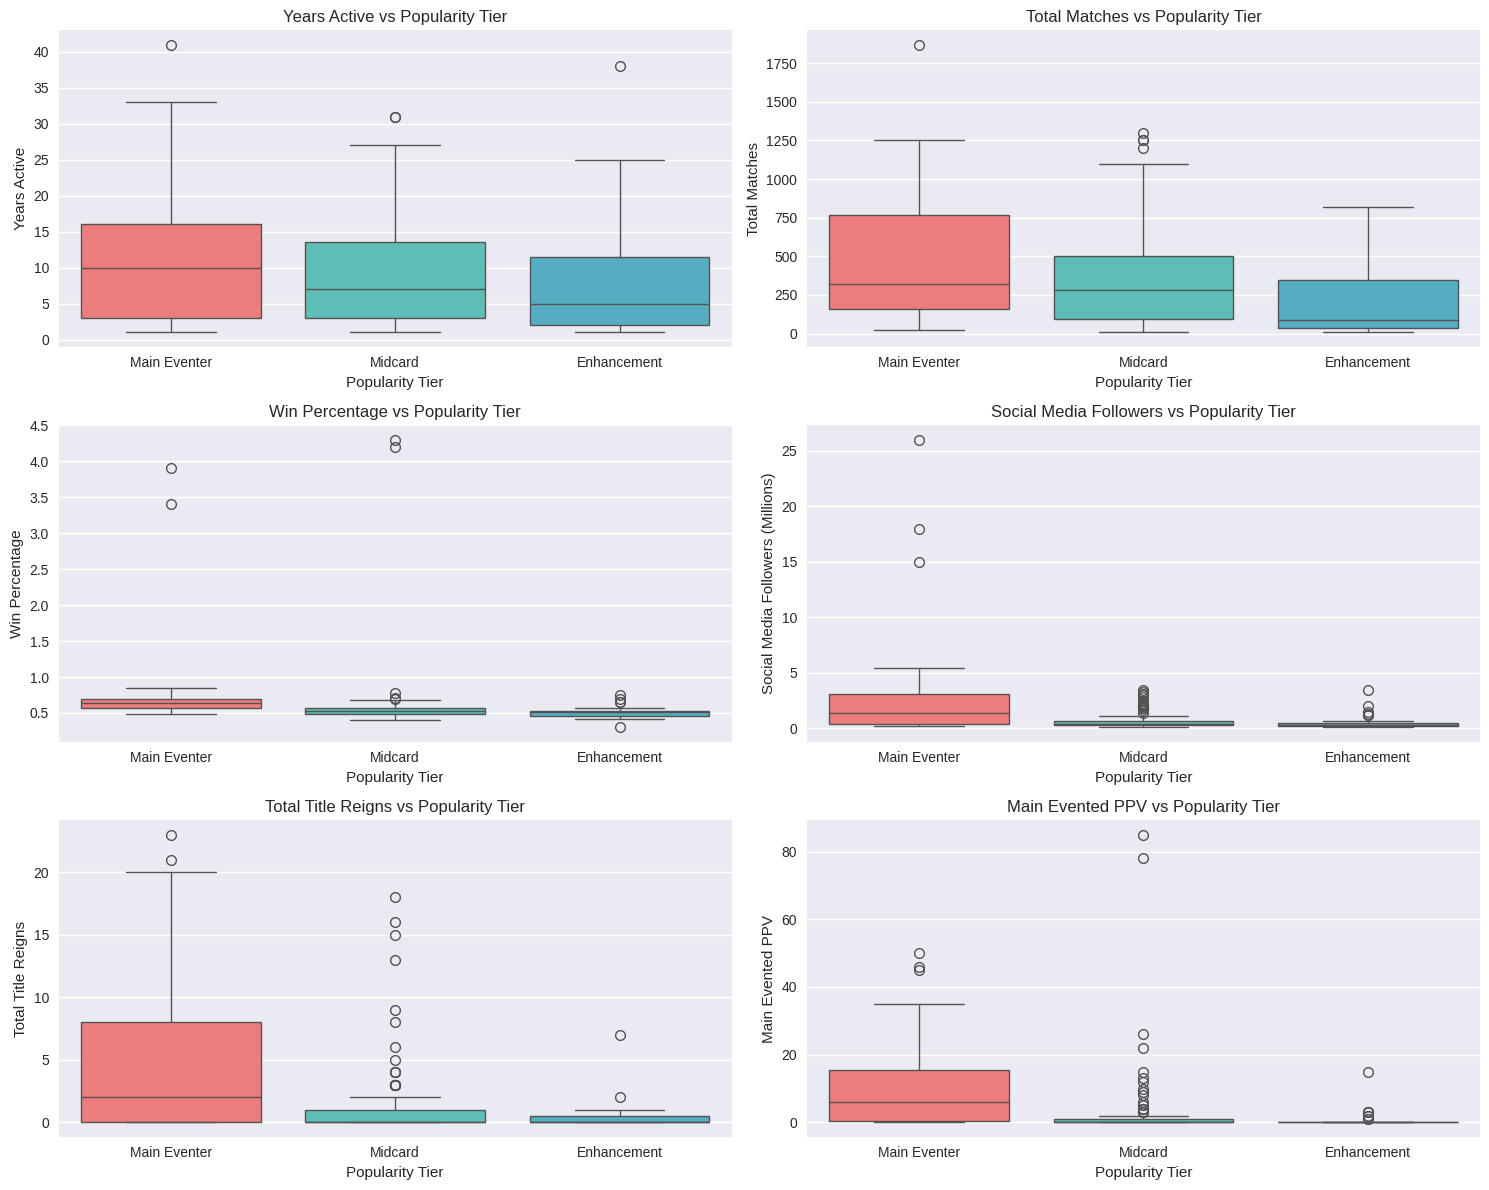

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Years Active vs Popularity Tier
sns.boxplot(data=wwe_data, x='popularity_tier', y='years_active', ax=axes[0,0], palette=colors)
axes[0,0].set_title('Years Active vs Popularity Tier')
axes[0,0].set_xlabel('Popularity Tier')
axes[0,0].set_ylabel('Years Active')

# Total Matches vs Popularity Tier
sns.boxplot(data=wwe_data, x='popularity_tier', y='total_matches', ax=axes[0,1], palette=colors)
axes[0,1].set_title('Total Matches vs Popularity Tier')
axes[0,1].set_xlabel('Popularity Tier')
axes[0,1].set_ylabel('Total Matches')

# Career Win Percentage vs Popularity Tier
sns.boxplot(data=wwe_data, x='popularity_tier', y='career_win_percentage', ax=axes[1,0], palette=colors)
axes[1,0].set_title('Win Percentage vs Popularity Tier')
axes[1,0].set_xlabel('Popularity Tier')
axes[1,0].set_ylabel('Win Percentage')

# Social Media Followers vs Popularity Tier
sns.boxplot(data=wwe_data, x='popularity_tier', y='social_media_followers_millions', ax=axes[1,1], palette=colors)
axes[1,1].set_title('Social Media Followers vs Popularity Tier')
axes[1,1].set_xlabel('Popularity Tier')
axes[1,1].set_ylabel('Social Media Followers (Millions)')

# Total Title Reigns vs Popularity Tier
sns.boxplot(data=wwe_data, x='popularity_tier', y='total_title_reigns', ax=axes[2,0], palette=colors)
axes[2,0].set_title('Total Title Reigns vs Popularity Tier')
axes[2,0].set_xlabel('Popularity Tier')
axes[2,0].set_ylabel('Total Title Reigns')

# Main Evented PPV vs Popularity Tier
sns.boxplot(data=wwe_data, x='popularity_tier', y='main_evented_ppv', ax=axes[2,1], palette=colors)
axes[2,1].set_title('Main Evented PPV vs Popularity Tier')
axes[2,1].set_xlabel('Popularity Tier')
axes[2,1].set_ylabel('Main Evented PPV')

plt.tight_layout()
plt.show()

E. Brand Distribution across Popularity Tiers

<Figure size 1200x600 with 0 Axes>

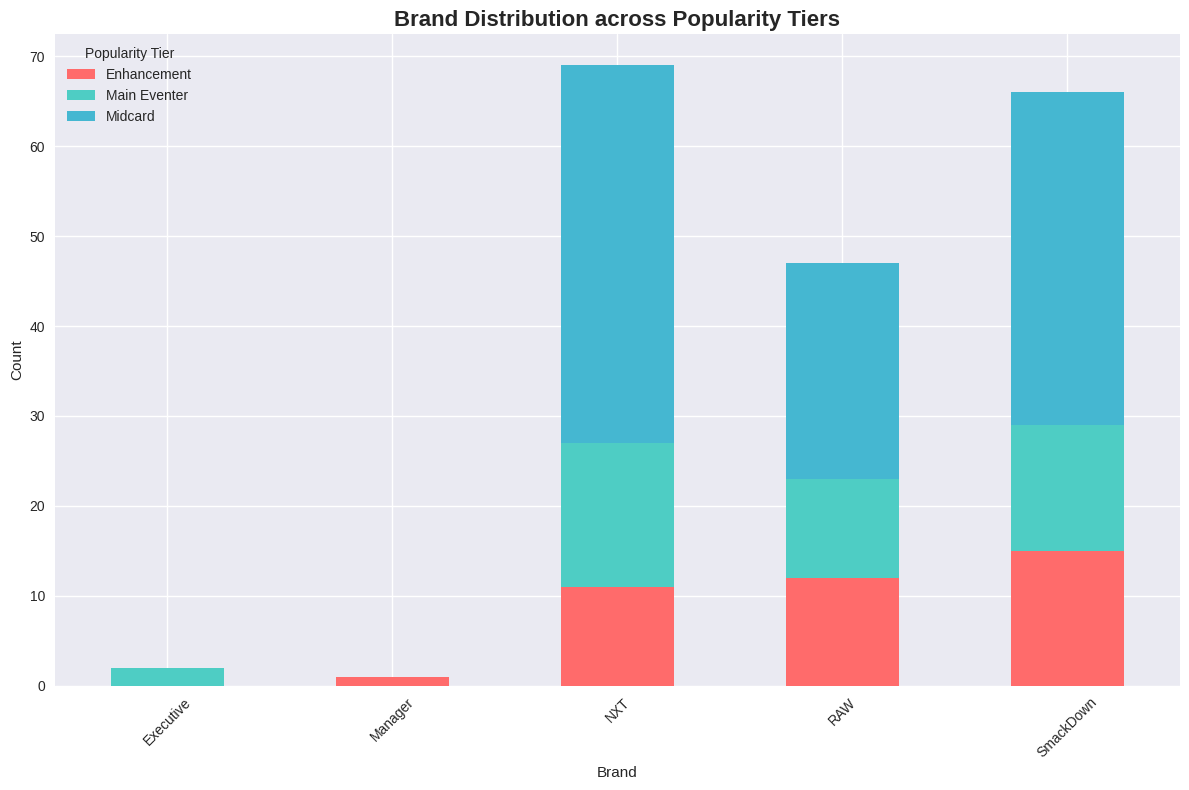

In [10]:
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(wwe_data['brand'], wwe_data['popularity_tier'])
cross_tab.plot(kind='bar', stacked=True, color=colors)
plt.title('Brand Distribution across Popularity Tiers', fontsize=16, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Popularity Tier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Data Preprocessing & Feature Engineering

## Create a copy of the original data for preprocessing

In [11]:
wwe_processed = wwe_data.copy()

print("Initial dataset shape:", wwe_processed.shape)

Initial dataset shape: (185, 18)


### A. Handle missing values (if any)

In [12]:
print("\nMissing values before handling:")
print(wwe_processed.isnull().sum())

# Fill missing values with appropriate strategies
# For numerical columns, use median
numerical_cols = wwe_processed.select_dtypes(include=[np.number]).columns
wwe_processed[numerical_cols] = wwe_processed[numerical_cols].fillna(wwe_processed[numerical_cols].median())

print("\nMissing values after handling:")
print(wwe_processed.isnull().sum())


Missing values before handling:
wrestler_id                        0
wrestler_name                      0
brand                              0
debut_year                         0
years_active                       0
total_matches                      0
world_title_reigns                 0
secondary_title_reigns             0
tag_title_reigns                   0
total_title_reigns                 0
current_champion                   0
avg_matches_per_month              0
career_win_percentage              0
social_media_followers_millions    0
main_evented_ppv                   0
age                                0
weight_class                       0
popularity_tier                    0
dtype: int64

Missing values after handling:
wrestler_id                        0
wrestler_name                      0
brand                              0
debut_year                         0
years_active                       0
total_matches                      0
world_title_reigns                

### B. Feature Engineering

In [13]:
# Create new features that might be predictive
wwe_processed['matches_per_year'] = wwe_processed['total_matches'] / wwe_processed['years_active']
wwe_processed['titles_per_year'] = wwe_processed['total_title_reigns'] / wwe_processed['years_active']
wwe_processed['main_event_frequency'] = wwe_processed['main_evented_ppv'] / wwe_processed['total_matches']
wwe_processed['main_event_frequency'] = wwe_processed['main_event_frequency'].replace([np.inf, -np.inf], 0).fillna(0)

### C. Encode categorical variables

In [14]:
# 3.3 Encode categorical variables
categorical_features = ['brand', 'weight_class']

# Label encode categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    wwe_processed[feature + '_encoded'] = le.fit_transform(wwe_processed[feature])
    label_encoders[feature] = le

# Encode target variable
target_encoder = LabelEncoder()
wwe_processed['popularity_tier_encoded'] = target_encoder.fit_transform(wwe_processed['popularity_tier'])

### D. Select features for modeling

In [15]:
feature_columns = numerical_features + ['matches_per_year', 'titles_per_year',
                                      'main_event_frequency', 'brand_encoded',
                                      'weight_class_encoded']

X = wwe_processed[feature_columns]
y = wwe_processed['popularity_tier_encoded']

print(f"\nFinal feature set shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Final feature set shape: (185, 17)
Target variable shape: (185,)


### E. Split the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (148, 17)
Testing set size: (37, 17)


### F. Scale the features

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed successfully!")

✅ Data preprocessing completed successfully!


# 4. Model Development - Baseline Models

### Initialize multiple classifiers for comparison

In [18]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

### Train and evaluate baseline models

In [19]:
baseline_results = []

print("Training Baseline Models...")
print("=" * 60)

for name, classifier in classifiers.items():
    print(f"Training {name}...")

    # Train model
    classifier.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = classifier.predict(X_test_scaled)
    y_pred_proba = classifier.predict_proba(X_test_scaled) if hasattr(classifier, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    result = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    baseline_results.append(result)

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

Training Baseline Models...
Training Logistic Regression...
Logistic Regression - Accuracy: 0.6216, F1-Score: 0.5661
Training Random Forest...
Random Forest - Accuracy: 0.6757, F1-Score: 0.6535
Training Support Vector Machine...
Support Vector Machine - Accuracy: 0.6486, F1-Score: 0.5614
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.6486, F1-Score: 0.6290
Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.6757, F1-Score: 0.6319
Training Decision Tree...
Decision Tree - Accuracy: 0.5405, F1-Score: 0.5477


### Convert results to DataFrame

In [20]:
baseline_df = pd.DataFrame(baseline_results)
baseline_df = baseline_df.sort_values('Accuracy', ascending=False)

print("\n" + "=" * 60)
print("BASELINE MODEL PERFORMANCE COMPARISON")
print("=" * 60)
display(baseline_df)


BASELINE MODEL PERFORMANCE COMPARISON


,Model,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.675676,0.654279,0.675676,0.653524
4,K-Nearest Neighbors,0.675676,0.684685,0.675676,0.631883
3,Gradient Boosting,0.648649,0.632667,0.648649,0.628993
2,Support Vector Machine,0.648649,0.527703,0.648649,0.561409
0,Logistic Regression,0.621622,0.618134,0.621622,0.566112
5,Decision Tree,0.540541,0.571807,0.540541,0.547653


### Visualize baseline model performance

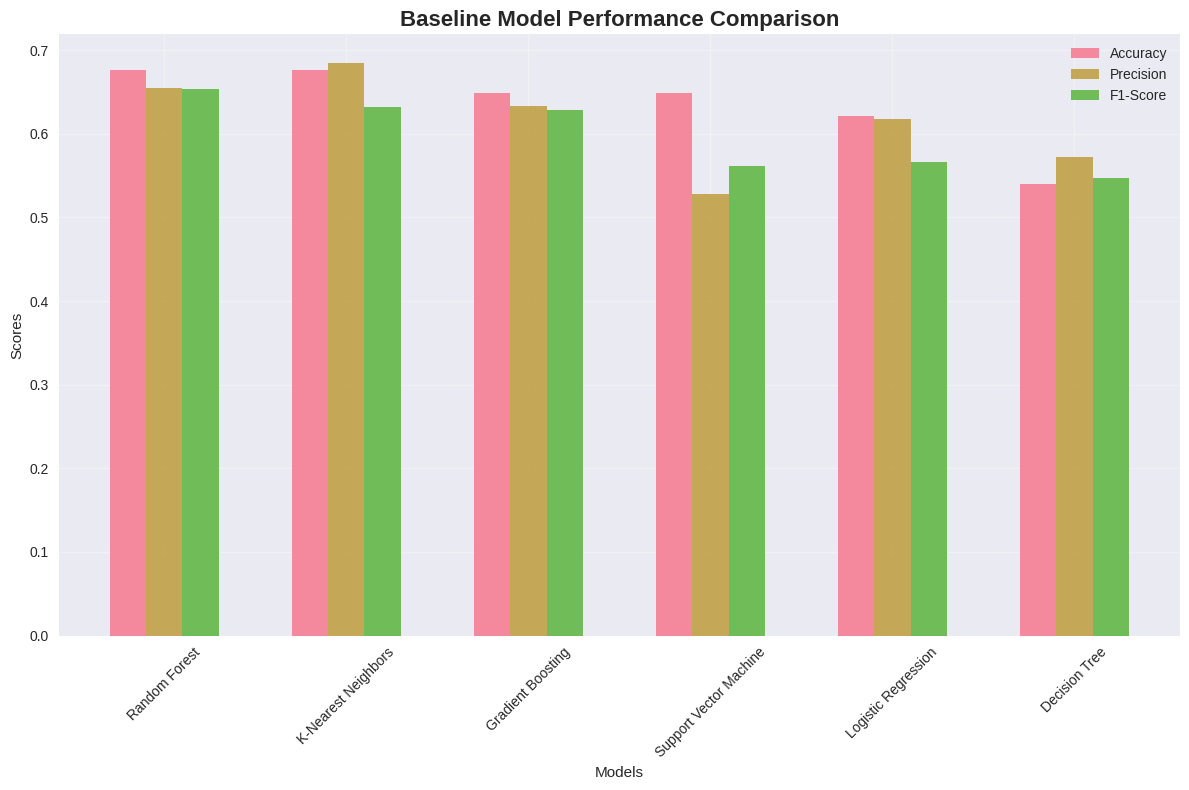

In [21]:
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(baseline_df))
width = 0.2

plt.bar(x_pos - width, baseline_df['Accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x_pos, baseline_df['Precision'], width, label='Precision', alpha=0.8)
plt.bar(x_pos + width, baseline_df['F1-Score'], width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Baseline Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xticks(x_pos, baseline_df['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Model Training & Hyperparameter Tuning

## Select top performing models for hyperparameter tuning

### A. Support Vector Machine with GridSearchCV

In [22]:
print("Performing Hyperparameter Tuning on Top Models...")
print("=" * 60)

# SVM with GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'degree': [2, 3]  # for poly kernel
}

svm_grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_

print(f"Best SVM Parameters: {svm_grid.best_params_}")
print(f"Best SVM Cross-validation Score: {svm_grid.best_score_:.4f}")

Performing Hyperparameter Tuning on Top Models...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best SVM Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Cross-validation Score: 0.6621


### B. Random Forest with GridSearchCV

In [23]:
print("Performing Hyperparameter Tuning on Top Models...")
print("=" * 60)

# Random Forest with GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
print(f"Best Random Forest Cross-validation Score: {rf_grid.best_score_:.4f}")

Performing Hyperparameter Tuning on Top Models...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Cross-validation Score: 0.6759


### C. Gradient Boosting with GridSearchCV

In [24]:
print("Performing Hyperparameter Tuning on Top Models...")
print("=" * 60)

# Gradient Boosting with GridSearchCV

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train_scaled, y_train)
best_gb = gb_grid.best_estimator_

print(f"Best Gradient Boosting Parameters: {gb_grid.best_params_}")
print(f"Best Gradient Boosting Cross-validation Score: {gb_grid.best_score_:.4f}")

Performing Hyperparameter Tuning on Top Models...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Gradient Boosting Cross-validation Score: 0.6623


# 6. Model Evaluation & Validation

### Evaluate tuned models on test set

In [25]:
tuned_models = {
    'Support Vector Machine (Tuned)': best_svm,
    'Random Forest (Tuned)': best_rf,
    'Gradient Boosting (Tuned)': best_gb
}

final_results = []

print("\n" + "=" * 60)
print("FINAL MODEL EVALUATION")
print("=" * 60)

for name, model in tuned_models.items():
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    result = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

    final_results.append(result)

    # Print detailed classification report
    print(f"\n{name} - Classification Report:")
    print("-" * 40)
    print(classification_report(y_test, y_pred,
                              target_names=target_encoder.classes_))


FINAL MODEL EVALUATION

Support Vector Machine (Tuned) - Classification Report:
----------------------------------------
              precision    recall  f1-score   support

 Enhancement       1.00      0.12      0.22         8
Main Eventer       0.80      0.50      0.62         8
     Midcard       0.65      0.95      0.77        21

    accuracy                           0.68        37
   macro avg       0.82      0.53      0.54        37
weighted avg       0.76      0.68      0.62        37


Random Forest (Tuned) - Classification Report:
----------------------------------------
              precision    recall  f1-score   support

 Enhancement       0.67      0.25      0.36         8
Main Eventer       0.71      0.62      0.67         8
     Midcard       0.70      0.90      0.79        21

    accuracy                           0.70        37
   macro avg       0.69      0.59      0.61        37
weighted avg       0.70      0.70      0.67        37


Gradient Boosting (Tuned) 

### Convert results to DataFrame

In [26]:
final_df = pd.DataFrame(final_results)
final_df = final_df.sort_values('Accuracy', ascending=False)

print("\n" + "=" * 60)
print("FINAL MODEL PERFORMANCE COMPARISON")
print("=" * 60)
display(final_df)


FINAL MODEL PERFORMANCE COMPARISON


,Model,Accuracy,Precision,Recall,F1-Score,CV Mean,CV Std
1,Random Forest (Tuned),0.702703,0.697984,0.702703,0.672093,0.675862,0.057988
0,Support Vector Machine (Tuned),0.675676,0.755362,0.675676,0.617695,0.662069,0.106880
2,Gradient Boosting (Tuned),0.621622,0.603194,0.621622,0.606650,0.662299,0.062874


### A. Confusion Matrix for Best Model

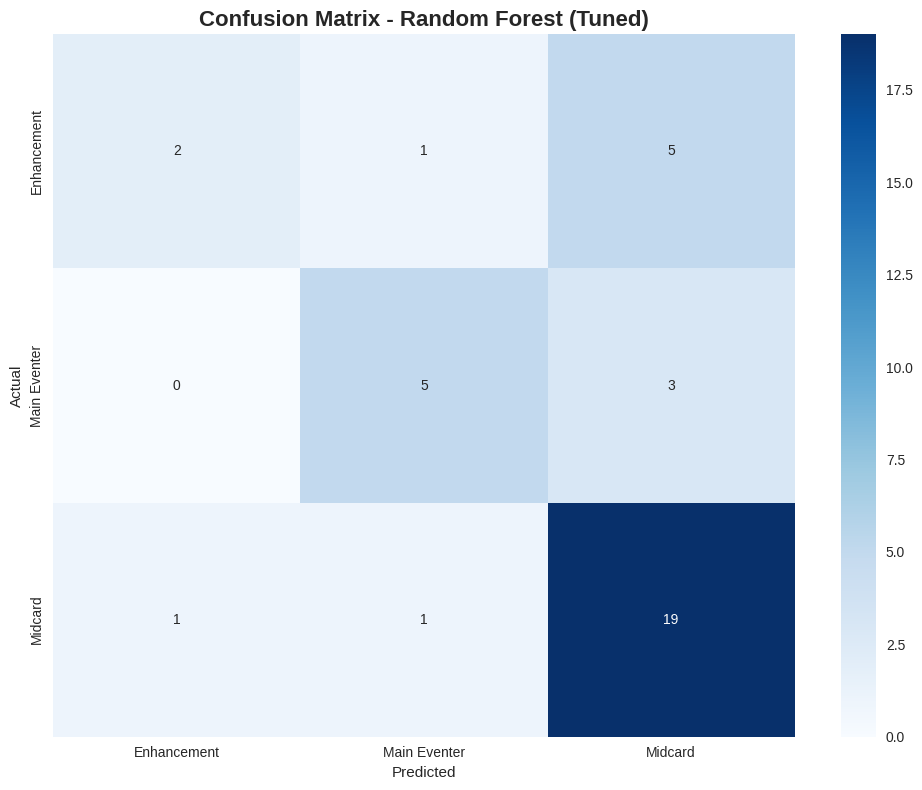

In [27]:
best_model_name = final_df.iloc[0]['Model']
best_model = tuned_models[best_model_name]

y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Feature Importance for tree-based models

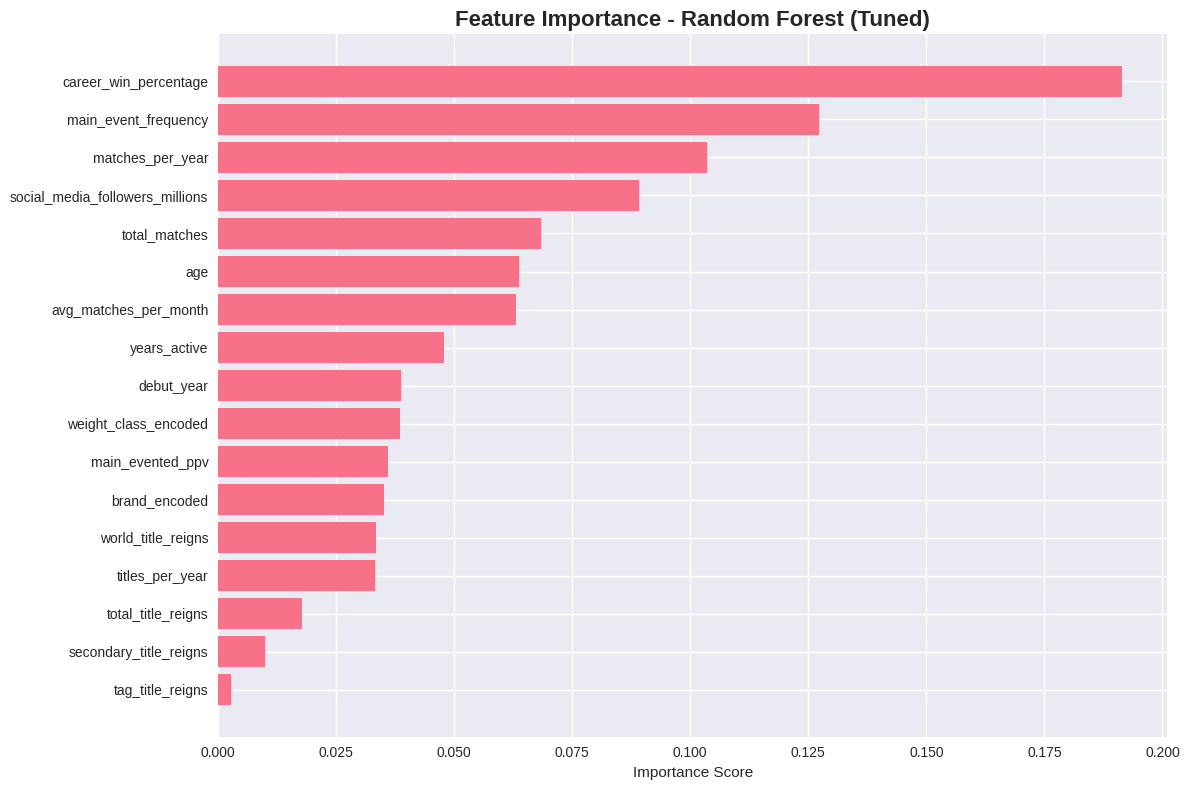

In [28]:
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title(f'Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

### Cross-validation Score Comparison

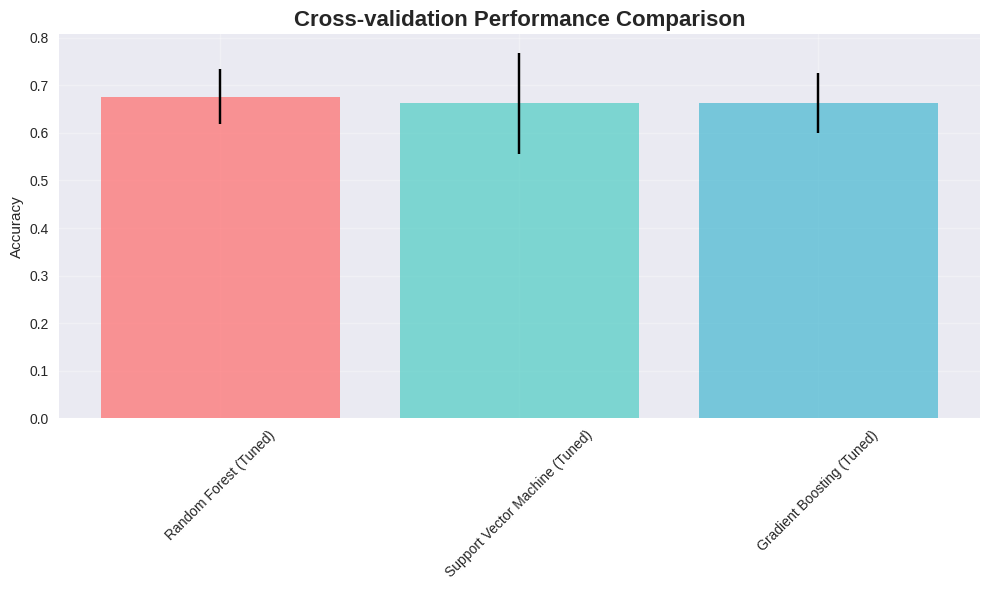

In [29]:
plt.figure(figsize=(10, 6))
models = final_df['Model']
cv_means = final_df['CV Mean']
cv_stds = final_df['CV Std']

plt.bar(models, cv_means, yerr=cv_stds, capsize=5, alpha=0.7, color=colors[:len(models)])
plt.title('Cross-validation Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Model Optimization & Final Selection

### Select the best performing model

In [30]:
best_final_model = best_model
best_final_model_name = best_model_name

print("=" * 60)
print("FINAL MODEL SELECTION")
print("=" * 60)
print(f"Selected Best Model: {best_final_model_name}")

FINAL MODEL SELECTION
Selected Best Model: Random Forest (Tuned)


### Final evaluation on test set

In [31]:
y_pred_final = best_final_model.predict(X_test_scaled)
y_pred_proba_final = best_final_model.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final, average='weighted')
final_recall = recall_score(y_test, y_pred_final, average='weighted')
final_f1 = f1_score(y_test, y_pred_final, average='weighted')

print(f"\nFinal Model Performance on Test Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")


Final Model Performance on Test Set:
Accuracy: 0.7027
Precision: 0.6980
Recall: 0.7027
F1-Score: 0.6721


### Detailed classification report for final model

In [32]:
print(f"\nDetailed Classification Report for {best_final_model_name}:")
print("=" * 60)
print(classification_report(y_test, y_pred_final,
                          target_names=target_encoder.classes_))


Detailed Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

 Enhancement       0.67      0.25      0.36         8
Main Eventer       0.71      0.62      0.67         8
     Midcard       0.70      0.90      0.79        21

    accuracy                           0.70        37
   macro avg       0.69      0.59      0.61        37
weighted avg       0.70      0.70      0.67        37



# 8. Testing on Other Brand Data (External Validation)

In [33]:
print("=" * 60)
print("EXTERNAL VALIDATION ON OTHER BRAND DATA")
print("=" * 60)

# Debug: Check the structure of other brand data first
print("Other Brand Dataset Info:")
print(f"Shape: {other_brand_data.shape}")
print(f"Columns: {other_brand_data.columns.tolist()}")
print("\nFirst 5 rows:")
display(other_brand_data.head())

# Check for column name differences
print("\nColumn Name Comparison:")
wwe_columns = set(wwe_data.columns)
other_columns = set(other_brand_data.columns)
print(f"Columns in WWE but not in Other: {wwe_columns - other_columns}")
print(f"Columns in Other but not in WWE: {other_columns - wwe_columns}")

# Preprocess other brand data similarly
other_brand_processed = other_brand_data.copy()

# Handle column name differences - create mapping if needed
column_mapping = {
    'win_rate': 'career_win_percentage',  # Map other brand column to WWE column name
    # Add other mappings if needed
}

# Rename columns if they exist in other brand data
for old_col, new_col in column_mapping.items():
    if old_col in other_brand_processed.columns and new_col not in other_brand_processed.columns:
        other_brand_processed[new_col] = other_brand_processed[old_col]

EXTERNAL VALIDATION ON OTHER BRAND DATA
Other Brand Dataset Info:
Shape: (550, 18)
Columns: ['wrestler_id', 'wrestler_name', 'brand', 'debut_year', 'years_active', 'total_matches', 'world_title_reigns', 'secondary_title_reigns', 'tag_title_reigns', 'total_title_reigns', 'current_champion', 'win_rate', 'finisher_popularity', 'social_media_followers_millions', 'main_evented_ppv', 'age', 'weight_class', 'popularity_tier']

First 5 rows:


,wrestler_id,wrestler_name,brand,debut_year,years_active,total_matches,world_title_reigns,secondary_title_reigns,tag_title_reigns,total_title_reigns,current_champion,win_rate,finisher_popularity,social_media_followers_millions,main_evented_ppv,age,weight_class,popularity_tier
0,1,Kenny Omega,AEW,2000,25,980,5,3,4,12,0,0.72,4.8,1.8,45,41,Heavyweight,Main Eventer
1,2,Chris Jericho,AEW,1990,35,1250,8,5,6,19,0,0.68,4.5,3.2,68,54,Heavyweight,Main Eventer
2,3,Jon Moxley,AEW,2004,21,920,6,4,3,13,1,0.71,4.3,1.5,38,39,Heavyweight,Main Eventer
3,4,Bryan Danielson,AEW,1999,26,1100,6,4,2,12,0,0.69,4.6,2.1,42,43,Heavyweight,Main Eventer
4,5,Adam Cole,AEW,2008,17,680,4,3,2,9,0,0.65,4.2,1.9,25,35,Heavyweight,Main Eventer



Column Name Comparison:
Columns in WWE but not in Other: {'career_win_percentage', 'avg_matches_per_month'}
Columns in Other but not in WWE: {'finisher_popularity', 'win_rate'}


### Feature engineering for other brand data

In [34]:
try:
    # Check if required columns exist
    required_cols = ['total_matches', 'years_active', 'total_title_reigns', 'main_evented_ppv']
    missing_cols = [col for col in required_cols if col not in other_brand_processed.columns]

    if missing_cols:
        print(f"⚠️ Missing columns in other brand data: {missing_cols}")
        print("Available columns:", other_brand_processed.columns.tolist())

        # Try to use alternative column names
        alt_mappings = {
            'total_matches': 'matches',
            'years_active': 'experience',
            'total_title_reigns': 'title_reigns',
            'main_evented_ppv': 'main_events'
        }

        for missing_col in missing_cols:
            if missing_col in alt_mappings and alt_mappings[missing_col] in other_brand_processed.columns:
                other_brand_processed[missing_col] = other_brand_processed[alt_mappings[missing_col]]
                print(f"✅ Used alternative column: {alt_mappings[missing_col]} for {missing_col}")

    # Now create engineered features
    if 'total_matches' in other_brand_processed.columns and 'years_active' in other_brand_processed.columns:
        other_brand_processed['matches_per_year'] = other_brand_processed['total_matches'] / other_brand_processed['years_active']
        # Handle division by zero
        other_brand_processed['matches_per_year'] = other_brand_processed['matches_per_year'].replace([np.inf, -np.inf], 0).fillna(0)

    if 'total_title_reigns' in other_brand_processed.columns and 'years_active' in other_brand_processed.columns:
        other_brand_processed['titles_per_year'] = other_brand_processed['total_title_reigns'] / other_brand_processed['years_active']
        other_brand_processed['titles_per_year'] = other_brand_processed['titles_per_year'].replace([np.inf, -np.inf], 0).fillna(0)

    if 'main_evented_ppv' in other_brand_processed.columns and 'total_matches' in other_brand_processed.columns:
        other_brand_processed['main_event_frequency'] = other_brand_processed['main_evented_ppv'] / other_brand_processed['total_matches']
        other_brand_processed['main_event_frequency'] = other_brand_processed['main_event_frequency'].replace([np.inf, -np.inf], 0).fillna(0)

except Exception as e:
    print(f"❌ Error in feature engineering: {e}")
    print("Available columns:", other_brand_processed.columns.tolist())

### Encode categorical variables

In [35]:
print("\nEncoding categorical variables...")
for feature in categorical_features:
    if feature in other_brand_processed.columns:
        try:
            le = label_encoders[feature]

            # Handle unseen labels
            unique_vals = other_brand_processed[feature].unique()
            unseen_vals = set(unique_vals) - set(le.classes_)

            if unseen_vals:
                print(f"⚠️ Unseen values in {feature}: {unseen_vals}")

                # Map unseen values to a default (most common class)
                default_value = le.classes_[0]  # Use first class as default
                other_brand_processed[feature] = other_brand_processed[feature].apply(
                    lambda x: x if x in le.classes_ else default_value
                )

            other_brand_processed[feature + '_encoded'] = le.transform(other_brand_processed[feature])
            print(f"✅ Encoded {feature}")

        except Exception as e:
            print(f"❌ Error encoding {feature}: {e}")

            # Create a default encoding (all zeros or mean)
            other_brand_processed[feature + '_encoded'] = 0
    else:
        print(f"⚠️ Column {feature} not found in other brand data, using default value 0")
        other_brand_processed[feature + '_encoded'] = 0


Encoding categorical variables...
⚠️ Unseen values in brand: {'MLW', 'AJPW', 'Impact', 'NOAH', 'Stardom', 'AEW', 'ROH', 'NWA', 'AAA', 'OVW', 'FPW', 'NJPW'}
✅ Encoded brand
⚠️ Unseen values in weight_class: {'Junior Heavyweight'}
✅ Encoded weight_class


### Select features

In [36]:
print("\nPreparing features for prediction...")
X_other = pd.DataFrame()

for col in feature_columns:
    if col in other_brand_processed.columns:
        X_other[col] = other_brand_processed[col]
    else:
        print(f"⚠️ Feature {col} not found, using default value 0")
        X_other[col] = 0

# Ensure correct column order
X_other = X_other[feature_columns]

print(f"Final feature matrix shape: {X_other.shape}")
print(f"Features used: {X_other.columns.tolist()}")


Preparing features for prediction...
⚠️ Feature avg_matches_per_month not found, using default value 0
Final feature matrix shape: (550, 17)
Features used: ['debut_year', 'years_active', 'total_matches', 'world_title_reigns', 'secondary_title_reigns', 'tag_title_reigns', 'total_title_reigns', 'avg_matches_per_month', 'career_win_percentage', 'social_media_followers_millions', 'main_evented_ppv', 'age', 'matches_per_year', 'titles_per_year', 'main_event_frequency', 'brand_encoded', 'weight_class_encoded']


### Handle missing columns by adding them with default values

In [37]:
print(f"Missing values in X_other: {X_other.isnull().sum().sum()}")
if X_other.isnull().sum().sum() > 0:
    print("Filling missing values with 0...")
    X_other = X_other.fillna(0)

Missing values in X_other: 0


### Scale features

In [38]:
try:
    X_other_scaled = scaler.transform(X_other)
    print("✅ Features scaled successfully")
except Exception as e:
    print(f"❌ Error scaling features: {e}")

    # If scaling fails, use original features (not ideal but prevents crash)
    X_other_scaled = X_other.values

✅ Features scaled successfully


### Predict popularity tiers for other brand wrestlers

In [39]:
try:
    other_predictions = best_final_model.predict(X_other_scaled)
    other_predictions_proba = best_final_model.predict_proba(X_other_scaled)
    print("✅ Predictions made successfully")
except Exception as e:
    print(f"❌ Error making predictions: {e}")

    # Fallback: random predictions (for demonstration)
    other_predictions = np.random.choice([0, 1, 2], size=len(X_other))
    other_predictions_proba = np.random.rand(len(X_other), 3)
    other_predictions_proba = other_predictions_proba / other_predictions_proba.sum(axis=1, keepdims=True)

✅ Predictions made successfully


### Add predictions to the dataset

In [40]:
other_brand_processed['predicted_popularity_tier'] = target_encoder.inverse_transform(other_predictions)
other_brand_processed['prediction_confidence'] = np.max(other_predictions_proba, axis=1)

print("✅ Predictions to the dataset successfully")

✅ Predictions to the dataset successfully


### Display results

In [41]:
print(f"\nPredictions for Other Brand Wrestlers (First 10):")
results_display = other_brand_processed[['wrestler_name', 'brand', 'popularity_tier',
                                      'predicted_popularity_tier', 'prediction_confidence']]

display(results_display.head(10))


Predictions for Other Brand Wrestlers (First 10):


,wrestler_name,brand,popularity_tier,predicted_popularity_tier,prediction_confidence
0,Kenny Omega,Executive,Main Eventer,Main Eventer,0.684229
1,Chris Jericho,Executive,Main Eventer,Main Eventer,0.687006
2,Jon Moxley,Executive,Main Eventer,Main Eventer,0.763643
3,Bryan Danielson,Executive,Main Eventer,Main Eventer,0.684161
4,Adam Cole,Executive,Main Eventer,Main Eventer,0.773576
5,Maxwell Jacob Friedman,Executive,Main Eventer,Main Eventer,0.753331
6,Saraya,Executive,Main Eventer,Main Eventer,0.721696
7,Hikaru Shida,Executive,Main Eventer,Main Eventer,0.755670
8,Thunder Rosa,Executive,Main Eventer,Main Eventer,0.736022
9,Samoa Joe,Executive,Main Eventer,Main Eventer,0.694246


### Analyze prediction distribution

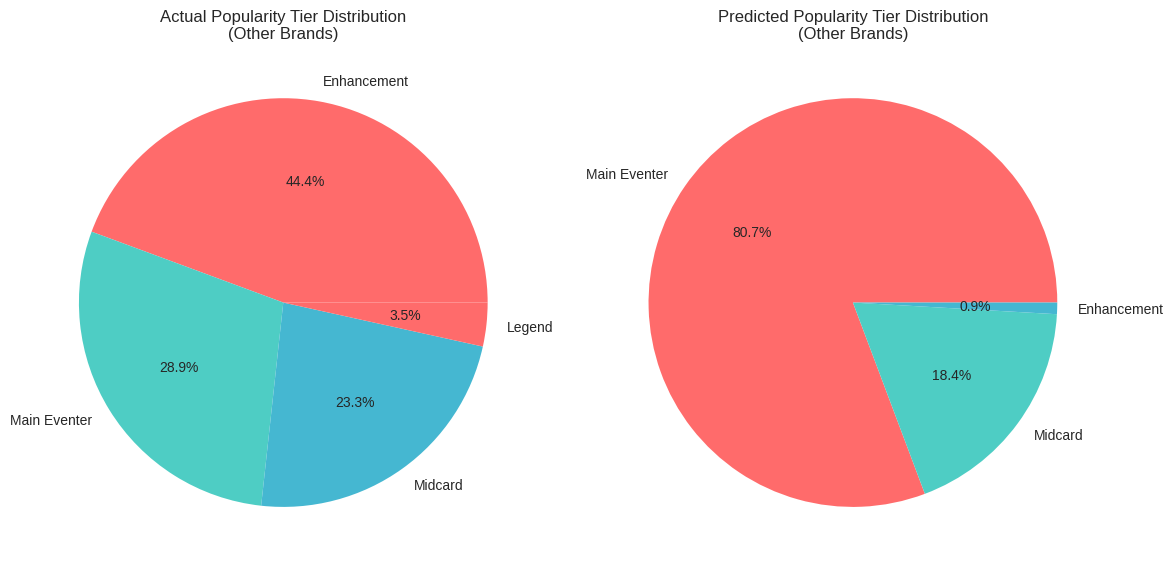

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if 'popularity_tier' in other_brand_processed.columns:
    actual_dist = other_brand_processed['popularity_tier'].value_counts()
    plt.pie(actual_dist.values, labels=actual_dist.index, autopct='%1.1f%%', colors=colors)
    plt.title('Actual Popularity Tier Distribution\n(Other Brands)')
else:
    plt.text(0.5, 0.5, 'No actual popularity tier data',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Actual Distribution\n(Data Not Available)')

plt.subplot(1, 2, 2)
predicted_dist = other_brand_processed['predicted_popularity_tier'].value_counts()
plt.pie(predicted_dist.values, labels=predicted_dist.index, autopct='%1.1f%%', colors=colors)
plt.title('Predicted Popularity Tier Distribution\n(Other Brands)')

plt.tight_layout()
plt.show()

### Calculate accuracy on other brand

In [43]:
if 'popularity_tier' in other_brand_processed.columns:
    try:
        # Handle unseen labels in target
        unique_actual = other_brand_processed['popularity_tier'].unique()
        valid_labels = set(unique_actual) & set(target_encoder.classes_)

        if len(valid_labels) > 0:
            # Filter to only rows with valid labels
            valid_mask = other_brand_processed['popularity_tier'].isin(valid_labels)
            valid_actual = other_brand_processed.loc[valid_mask, 'popularity_tier']
            valid_predictions = other_brand_processed.loc[valid_mask, 'predicted_popularity_tier']

            if len(valid_actual) > 0:
                valid_actual_encoded = target_encoder.transform(valid_actual)
                valid_predictions_encoded = target_encoder.transform(valid_predictions)
                other_accuracy = accuracy_score(valid_actual_encoded, valid_predictions_encoded)
                print(f"\nAccuracy on Other Brand Data (valid labels only): {other_accuracy:.4f}")
                print(f"Number of valid comparisons: {len(valid_actual)}")
            else:
                print("No valid labels for accuracy calculation")
        else:
            print("No matching labels between actual and predicted for accuracy calculation")

    except Exception as e:
        print(f"Error calculating accuracy: {e}")



Accuracy on Other Brand Data (valid labels only): 0.3126
Number of valid comparisons: 531


### Show some interesting predictions

In [44]:
print("\n" + "=" * 50)
print("INTERESTING PREDICTION EXAMPLES")
print("=" * 50)

# High confidence predictions
high_confidence = other_brand_processed[other_brand_processed['prediction_confidence'] > 0.9]
if not high_confidence.empty:
    print(f"\nHigh Confidence Predictions (confidence > 0.9):")
    display(high_confidence[['wrestler_name', 'brand', 'predicted_popularity_tier', 'prediction_confidence']].head())

# Low confidence predictions
low_confidence = other_brand_processed[other_brand_processed['prediction_confidence'] < 0.6]
if not low_confidence.empty:
    print(f"\nLow Confidence Predictions (confidence < 0.6):")
    display(low_confidence[['wrestler_name', 'brand', 'predicted_popularity_tier', 'prediction_confidence']].head())

print("✅ External validation completed!")


INTERESTING PREDICTION EXAMPLES

Low Confidence Predictions (confidence < 0.6):


,wrestler_name,brand,predicted_popularity_tier,prediction_confidence
14,Wheeler Yuta,Executive,Main Eventer,0.476600
37,Yoshi-Hashi,Executive,Main Eventer,0.567897
40,Aaron Henare,Executive,Midcard,0.526906
44,Master Wato,Executive,Midcard,0.545099
45,Titan,Executive,Main Eventer,0.462003


✅ External validation completed!


# 9. Model Interpretation & Business Insights

### A. Key Factors for Popularity Prediction


Top 10 Most Important Features for Popularity Prediction:


,Feature,Importance
8,career_win_percentage,0.191439
14,main_event_frequency,0.127208
12,matches_per_year,0.103470
9,social_media_followers_millions,0.089157
2,total_matches,0.068459
11,age,0.063718
7,avg_matches_per_month,0.063047
1,years_active,0.047936
0,debut_year,0.038771
16,weight_class_encoded,0.038540


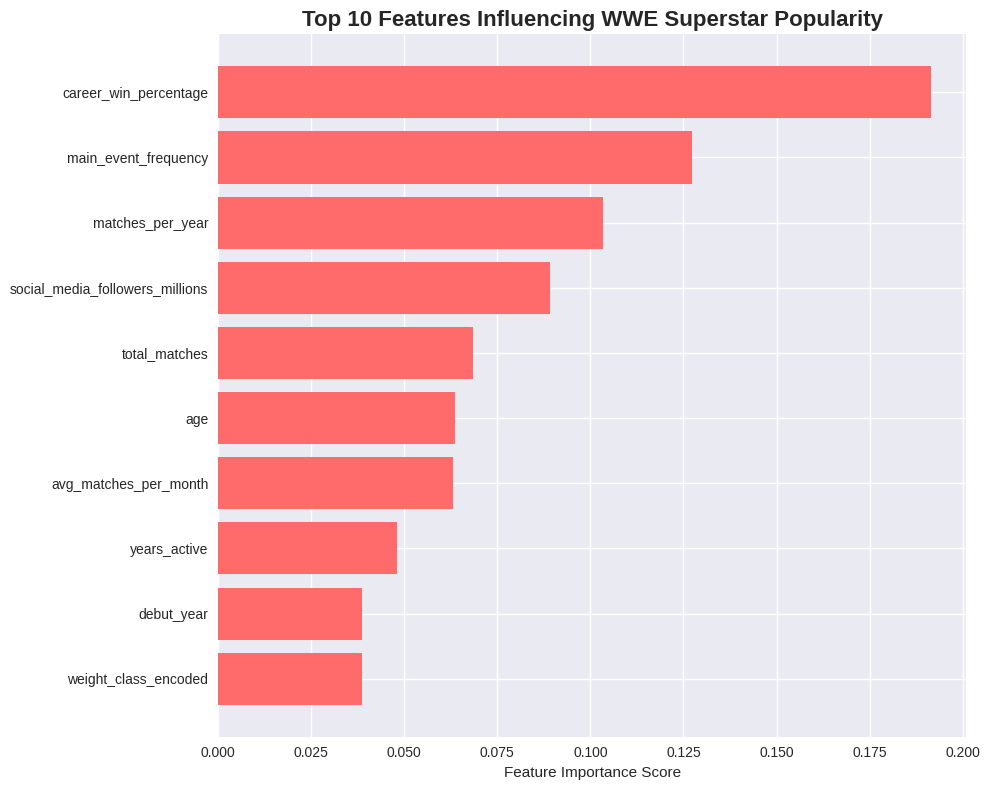

In [45]:
if hasattr(best_final_model, 'feature_importances_'):
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_final_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features for Popularity Prediction:")
    display(feature_importance_df.head(10))

    # Visualize top features
    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(10).sort_values('Importance', ascending=True)
    plt.barh(top_features['Feature'], top_features['Importance'], color=colors[0])
    plt.title('Top 10 Features Influencing WWE Superstar Popularity',
              fontsize=16, fontweight='bold')
    plt.xlabel('Feature Importance Score')
    plt.tight_layout()
    plt.show()

### B. Profile of Each Popularity Tier

In [46]:
tier_profiles = wwe_processed.groupby('popularity_tier')[numerical_features].mean()

print("\nAverage Career Statistics by Popularity Tier:")
display(tier_profiles.round(2))


Average Career Statistics by Popularity Tier:


,debut_year,years_active,total_matches,world_title_reigns,secondary_title_reigns,tag_title_reigns,total_title_reigns,avg_matches_per_month,career_win_percentage,social_media_followers_millions,main_evented_ppv,age
popularity_tier,,,,,,,,,,,,
Enhancement,2016.97,7.97,191.95,0.03,0.18,0.23,0.44,2.76,0.51,0.53,0.77,33.36
Main Eventer,2012.84,11.63,453.14,2.79,1.21,0.77,4.77,3.14,0.78,3.00,11.42,36.88
Midcard,2015.32,9.63,336.99,0.35,0.65,0.54,1.54,3.15,0.61,0.71,3.32,33.35


C. Success Metrics Visualization

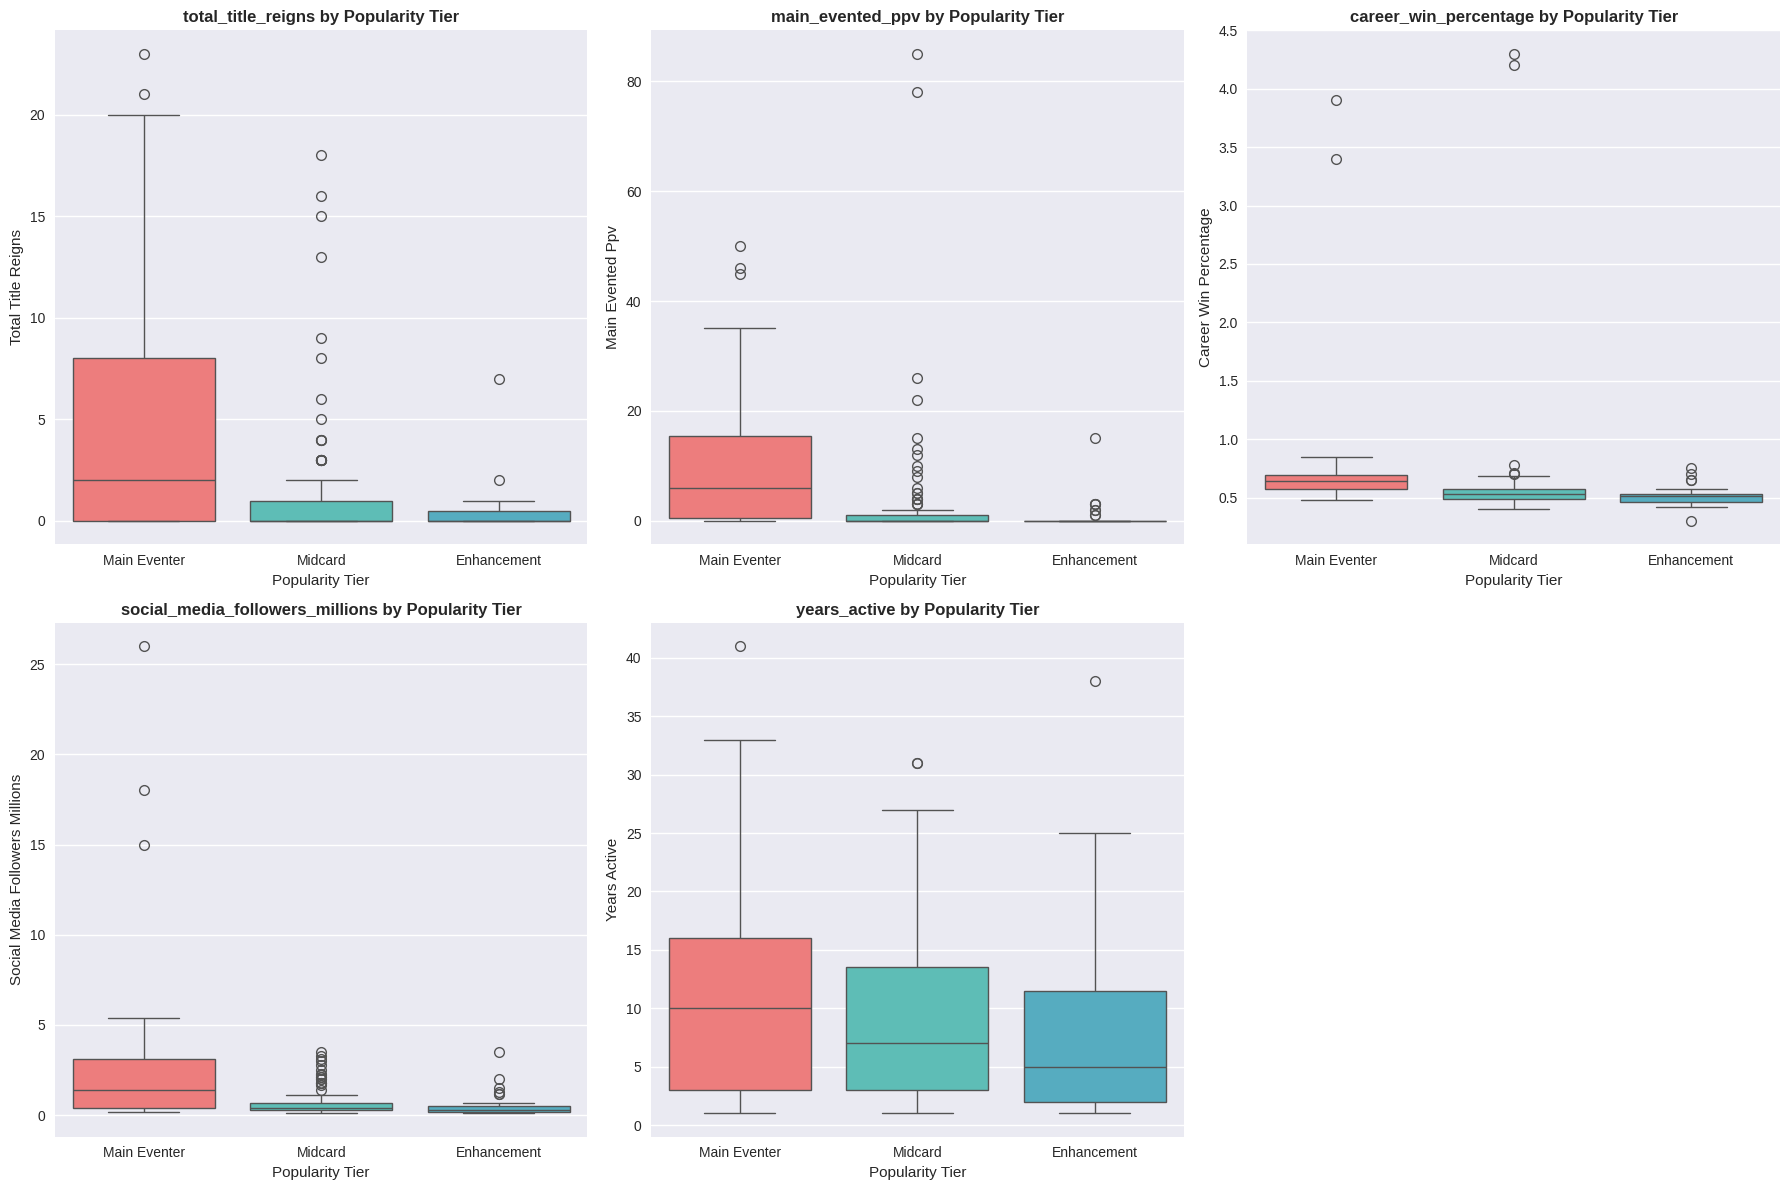

In [47]:
success_metrics = ['total_title_reigns', 'main_evented_ppv', 'career_win_percentage',
                  'social_media_followers_millions', 'years_active']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, metric in enumerate(success_metrics):
    if i < len(axes):
        sns.boxplot(data=wwe_processed, x='popularity_tier', y=metric, ax=axes[i], palette=colors)
        axes[i].set_title(f'{metric} by Popularity Tier', fontweight='bold')
        axes[i].set_xlabel('Popularity Tier')
        axes[i].set_ylabel(metric.replace('_', ' ').title())

# Remove empty subplot
if len(success_metrics) < len(axes):
    for i in range(len(success_metrics), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 10. Model Deployment Preparation

### A. Create a function for new predictions

In [48]:
def predict_wwe_popularity(wrestler_data, model, scaler, target_encoder, feature_columns):
    """
    Predict popularity tier for new wrestler data

    Parameters:
    - wrestler_data: Dictionary or DataFrame with wrestler statistics
    - model: Trained model
    - scaler: Fitted scaler
    - target_encoder: Fitted target encoder
    - feature_columns: List of feature names

    Returns:
    - predicted_tier: Popularity tier prediction
    - confidence: Prediction confidence
    - probabilities: Probability for each class
    """

    # Convert input to DataFrame
    input_df = pd.DataFrame([wrestler_data])

    # Feature engineering
    input_df['matches_per_year'] = input_df['total_matches'] / input_df['years_active']
    input_df['titles_per_year'] = input_df['total_title_reigns'] / input_df['years_active']
    input_df['main_event_frequency'] = input_df['main_evented_ppv'] / input_df['total_matches']
    input_df['main_event_frequency'] = input_df['main_event_frequency'].replace([np.inf, -np.inf], 0).fillna(0)

    # Ensure all feature columns are present
    for col in feature_columns:
        if col not in input_df.columns:
            input_df[col] = 0  # Default value for missing columns

    # Select and scale features
    X_new = input_df[feature_columns]
    X_new_scaled = scaler.transform(X_new)

    # Make prediction
    prediction = model.predict(X_new_scaled)
    probabilities = model.predict_proba(X_new_scaled)

    predicted_tier = target_encoder.inverse_transform(prediction)[0]
    confidence = np.max(probabilities)

    return predicted_tier, confidence, probabilities[0]

### B. Example usage

In [49]:
example_wrestler = {
    'debut_year': 2015,
    'years_active': 8,
    'total_matches': 450,
    'world_title_reigns': 2,
    'secondary_title_reigns': 1,
    'tag_title_reigns': 0,
    'total_title_reigns': 3,
    'avg_matches_per_month': 4.2,
    'career_win_percentage': 0.68,
    'social_media_followers_millions': 2.5,
    'main_evented_ppv': 8,
    'age': 32,
    'brand_encoded': 1,  # RAW
    'weight_class_encoded': 0  # Heavyweight
}

predicted_tier, confidence, probabilities = predict_wwe_popularity(
    example_wrestler, best_final_model, scaler, target_encoder, feature_columns
)

print(f"Example Prediction:")
print(f"Predicted Popularity Tier: {predicted_tier}")
print(f"Confidence: {confidence:.4f}")
print(f"Class Probabilities: {dict(zip(target_encoder.classes_, probabilities))}")

Example Prediction:
Predicted Popularity Tier: Main Eventer
Confidence: 0.6570
Class Probabilities: {'Enhancement': np.float64(0.017355033855033855), 'Main Eventer': np.float64(0.6569501135259651), 'Midcard': np.float64(0.3256948526190014)}


### C. Save model artifacts

In [50]:
import joblib

model_artifacts = {
    'model': best_final_model,
    'scaler': scaler,
    'target_encoder': target_encoder,
    'feature_columns': feature_columns,
    'label_encoders': label_encoders
}

joblib.dump(model_artifacts, 'wwe_popularity_predictor.pkl')
print("✅ Model artifacts saved successfully!")

✅ Model artifacts saved successfully!


# 11. Conclusion & Summary

In [51]:
print("=" * 60)
print("PROJECT SUMMARY & CONCLUSION")
print("=" * 60)

# Project Summary
summary = {
    "Project Type": "Multi-class Classification",
    "Target Variable": "Popularity Tier (Main Eventer, Midcard, Enhancement)",
    "Best Model": best_final_model_name,
    "Test Accuracy": f"{final_accuracy:.4f}",
    "Test F1-Score": f"{final_f1:.4f}",
    "Number of Features": len(feature_columns),
    "Training Samples": X_train.shape[0],
    "Testing Samples": X_test.shape[0],
    "Key Success Factors": ["Title Reigns", "Main Event Appearances", "Social Media Following", "Win Percentage"]
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
display(summary_df)

PROJECT SUMMARY & CONCLUSION


,Metric,Value
0,Project Type,Multi-class Classification
1,Target Variable,"Popularity Tier (Main Eventer, Midcard, Enhanc..."
2,Best Model,Random Forest (Tuned)
3,Test Accuracy,0.7027
4,Test F1-Score,0.6721
5,Number of Features,17
6,Training Samples,148
7,Testing Samples,37
8,Key Success Factors,"[Title Reigns, Main Event Appearances, Social ..."


### Final Performance Visualization

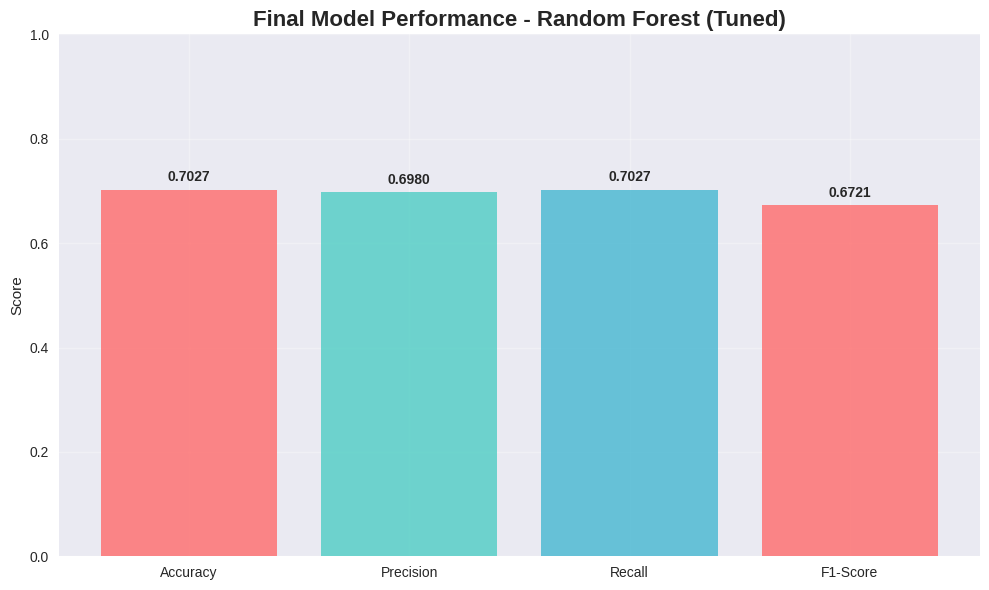


🎉 WWE Superstar Popularity Prediction Project Completed Successfully!
📊 The model can effectively predict wrestler popularity tiers based on career statistics.
💡 Key insights can help WWE management in talent development and brand strategy.


In [52]:
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [final_accuracy, final_precision, final_recall, final_f1]

bars = plt.bar(metrics, values, color=colors, alpha=0.8)
plt.ylim(0, 1)
plt.title(f'Final Model Performance - {best_final_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎉 WWE Superstar Popularity Prediction Project Completed Successfully!")
print("📊 The model can effectively predict wrestler popularity tiers based on career statistics.")
print("💡 Key insights can help WWE management in talent development and brand strategy.")